In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from time import time
import seaborn as sns


import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [2]:
# holdout = pd.read_excel('sentiment_test.xlsx')

In [3]:
# df = pd.read_excel('sentiment_train.xlsx')

In [4]:
# holdout['content'] = holdout['content'].apply(str)
# df['content'] = df['content'].apply(str)

In [7]:
# df.shape

In [9]:
gg = pd.read_excel('Google & Yelp Reviews.xlsx',sheetname=0)
df = gg[~gg['Review'].isnull()]

In [10]:
!whoami

In [11]:
import nltk

In [13]:
# nltk.download('stopwords')

In [18]:
from nltk.corpus import stopwords 


In [23]:
stopwords = set(stopwords.words('english'))


In [24]:
punctuation = set(string.punctuation) 


In [25]:
lemmatize = WordNetLemmatizer()

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk

In [27]:
stop = pd.read_fwf('stop.txt',names=['words'])

In [28]:
stopwords.update(set(stop['words'].values))

In [29]:
# print (list(stopwords)[:10])

In [30]:
stopwords.update(set(['dont','lot','wa','im','ha','doe','wa', 'able',]))

In [31]:
# len(stopwords)

In [32]:
# len(stopwords)

In [33]:
# df

In [34]:
# df.head(1)

In [35]:
# df['content'].count()

In [36]:
# sns.countplot(df['sentiment'])
# 

In [37]:
# stopwords=[]

In [38]:

def cleaning(article):
    article = str(article)
    zero = "".join(i for i in article if i not in punctuation)
    
    one = " ".join([i for i in zero.lower().split() if i not in stopwords])
#     one = zero
    
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [39]:
from collections import defaultdict

In [40]:
freq = defaultdict(int)

In [41]:
for i in stopwords:
    freq[i]+=1

In [42]:
type(freq)

collections.defaultdict

In [43]:
freq['it']

1

### all

In [44]:
# all_content = df['content'].append(holdout['content'])

In [45]:
all_content=df['Review']

In [46]:
apple = all_content

### choices

In [47]:
nltk.download('wordnet')

True

In [48]:
start = time()

ap_text = apple.apply(cleaning)
ap_text_list = [i.split() for i in ap_text]
print (len(ap_text_list))

print ('used: {:.2f}s'.format(time()-start))


In [49]:
ap_text[:10]

2     edward schiller service tech complete highly r...
3     product service impressed job foundation compa...
4     tried charge 500 replace sump pump battery rep...
6                                  awesome company deal
7            prompt efficient glad chose company thanks
8                                              time job
9     ive heard masterdry little positive neighbor a...
11    jeremy kevin extremely nice informative extrem...
13                 service tech professional inspection
14                       solve quickly price affordable
Name: Review, dtype: object

In [50]:
from gensim.models.phrases import Phraser, Phrases

In [51]:
start = time()
phs = Phrases(ap_text_list)
print ('used: {:.2f}s'.format(time()-start))


In [52]:
bi_gram = Phraser(phs)

In [53]:
start = time()

new_bi_list = [bi_gram[i] for i in ap_text_list]

print ('used: {:.2f}s'.format(time()-start))


In [54]:
bi_gram[ap_text_list[0]]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [55]:
new_bi_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

In [56]:
# start = time()

# phs3=Phrases(new_bi_list)
# tri_gram=Phraser(phs3)

# print ('used: {:.2f}s'.format(time()-start))


In [57]:
# start = time()

# new_tri_list = [tri_gram[i] for i in new_bi_list]

# print ('used: {:.2f}s'.format(time()-start))


In [58]:
new_tri_list = new_bi_list

In [59]:
make_dic = dict()

In [60]:
for i,j in zip(range(len(new_tri_list)), new_tri_list):
    make_dic[i]=j

In [61]:
without_stop = pd.Series(make_dic)

In [62]:
without_stop.head(10)

0    [edward, schiller, service_tech, complete, hig...
1    [product, service, impressed, job, foundation,...
2    [tried, charge, 500, replace, sump_pump, batte...
3                             [awesome, company, deal]
4    [prompt, efficient, glad, chose, company, thanks]
5                                          [time, job]
6    [ive, heard, masterdry, little, positive, neig...
7    [jeremy_kevin, extremely, nice, informative, e...
8             [service_tech, professional, inspection]
9                  [solve, quickly, price, affordable]
dtype: object

In [63]:
len(without_stop[0])

5

In [64]:
def helper_len(x):
    leng=[0]
    for i in x:
        leng.append(len(i))
    return max(leng)

In [65]:
with_stop = without_stop.apply(helper_len)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
with_stop.value_counts().head(10)

16    250
12    203
13    172
15    136
17    131
18     97
11     89
14     81
10     78
20     70
dtype: int64

In [68]:
graph = with_stop.value_counts()

<Container object of 24 artists>

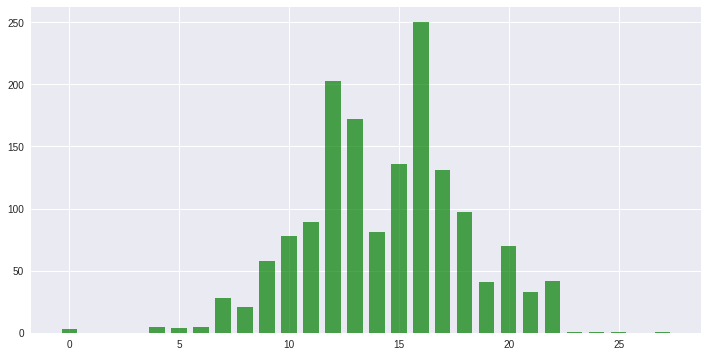

In [69]:
plt.figure(figsize=(12,6))
plt.bar(graph.index, graph.values, .7, color='g', alpha=.7)

In [70]:
without_stop

0       [edward, schiller, service_tech, complete, hig...
1       [product, service, impressed, job, foundation,...
2       [tried, charge, 500, replace, sump_pump, batte...
3                                [awesome, company, deal]
4       [prompt, efficient, glad, chose, company, thanks]
5                                             [time, job]
6       [ive, heard, masterdry, little, positive, neig...
7       [jeremy_kevin, extremely, nice, informative, e...
8                [service_tech, professional, inspection]
9                     [solve, quickly, price, affordable]
10      [guy, crook, contacted, estimate, crawl_space,...
11                         [time, service, thorough, job]
12      [experience, standard_heating, air_conditionin...
13      [michael, ran, crew, ran, obstacle, kept_infor...
14                                   [hour, calling, job]
15      [competent, efficient, technician, impressed, ...
16      [past, month, trying, morris, jenkins, service...
17      [jerem

In [71]:
ap_text_list = list(without_stop.values)

In [72]:
len(ap_text_list)

1551

In [73]:
ap_text_list[0]

[u'edward', u'schiller', u'service_tech', u'complete', u'highly_recommend']

## topic models

In [74]:
# ! pip install gensim pyLDAvis WordCloud

### change name

In [75]:
# Importing Gensim
import gensim
from gensim import corpora

from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='hw_running120.log',filemode='w')

In [76]:


# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(ap_text_list)
dictionary.save('hw120.dict')
print (dictionary)

In [77]:
# gensim.models.ldamodel.LdaModel?

In [78]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in ap_text_list]
corpora.MmCorpus.serialize('hw120.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

In [79]:
# Lda?

In [80]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=36, id2word = dictionary, 
#                passes=5
              )
'used: {:.2f}s'.format(time()-start)

'used: 16.07s'

In [81]:
ldamodel.print_topics()

[(3,
  u'0.024*"professional" + 0.015*"service" + 0.014*"basement" + 0.014*"job" + 0.013*"crew" + 0.010*"company" + 0.008*"recommend" + 0.008*"water" + 0.006*"wall" + 0.006*"mike"'),
 (0,
  u'0.019*"basement" + 0.015*"system" + 0.014*"water" + 0.012*"house" + 0.010*"home" + 0.009*"crew" + 0.008*"job" + 0.007*"sump_pump" + 0.006*"company" + 0.006*"call"'),
 (20,
  u'0.019*"job" + 0.019*"professional" + 0.016*"basement" + 0.015*"crew" + 0.010*"system" + 0.010*"service" + 0.010*"company" + 0.009*"day" + 0.008*"time" + 0.008*"highly_recommend"'),
 (7,
  u'0.010*"service" + 0.009*"de" + 0.007*"le" + 0.007*"crew" + 0.006*"basement" + 0.006*"\xc3" + 0.006*"professional" + 0.006*"look" + 0.006*"pour" + 0.006*"job"'),
 (4,
  u'0.013*"job" + 0.011*"professional" + 0.009*"pleased" + 0.008*"crew" + 0.008*"polite" + 0.007*"system" + 0.007*"explained" + 0.007*"basement" + 0.007*"thanks" + 0.007*"highly_recommend"'),
 (27,
  u'0.020*"crew" + 0.017*"company" + 0.013*"job" + 0.010*"service" + 0.009*"ba

In [82]:
!pip install pyLDAvis

In [83]:
ldamodel.save('hw120.model')


## load saved model

In [84]:
from gensim.models import LdaModel
loading = LdaModel.load('hw120.model')

## plotting



In [85]:
import pyLDAvis.gensim
import gensim
from time import time
pyLDAvis.enable_notebook()

In [86]:
d = gensim.corpora.Dictionary.load('hw120.dict')
c = gensim.corpora.MmCorpus('hw120.mm')
lda = gensim.models.LdaModel.load('hw120.model')

In [87]:
start = time()

data = pyLDAvis.gensim.prepare(lda, c, d)

print ('used: {:.2f}s'.format(time()-start))

In [88]:
pyLDAvis.save_html(data,'hw120.html')



In [89]:
data

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
16     7.199445        1       1  0.071345 -0.034440
31     6.065519        1       2  0.049323 -0.051429
18     5.280532        1       3  0.032266 -0.024401
17     4.775616        1       4  0.058572  0.001707
19     4.021220        1       5  0.054811  0.000266
1      4.010764        1       6  0.051404 -0.011549
30     3.947549        1       7  0.018744 -0.054108
5      3.862525        1       8  0.055747 -0.030487
24     3.751575        1       9  0.010187 -0.008679
20     3.686061        1      10  0.045705  0.011135
32     3.321836        1      11  0.015691 -0.057641
25     3.041911        1      12  0.059094  0.007976
6      3.012756        1      13  0.030481 -0.027806
23     2.662926        1      14 -0.070144 -0.038144
0      2.649600        1      15  0.031283 -0.008013
33     2.544710        1      16  0.036348  0.028038
26     2.486831        1      17 -0.122741 -0.027850
15     2.378636        1      18 -0.175168 -0.053878
14     2.343742        1      19  0.035595 -0.019576
22     2.337527        1      20 -0.051802 -0.029215
35     2.221927        1      21  0.030914  0.067985
28     2.140921        1      22  0.012690 -0.017051
13     2.112119        1      23  0.028666  0.052245
21     2.109012        1      24  0.039270 -0.041313
27     2.035270        1      25  0.021002 -0.015478
3      1.889552        1      26  0.030859  0.021052
29     1.764080        1      27 -0.000440 -0.018237
8      1.762207        1      28 -0.065044  0.008398
4      1.682550        1      29  0.016516  0.026241
7      1.613298        1      30 -0.148826 -0.015788
10     1.512093        1      31  0.008112  0.059343
9      1.460276        1      32 -0.013176  0.118206
2      1.279389        1      33 -0.034300 -0.014619
11     1.158270        1      34 -0.031558  0.075643
34     1.157907        1      35 -0.028747  0.051684
12     0.719849        1      36 -0.102673  0.069785, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
6385  Default  684.000000               job  684.000000  30.0000  30.0000
1847  Default   58.000000                de   58.000000  29.0000  29.0000
3406  Default  521.000000              crew  521.000000  28.0000  28.0000
2253  Default  415.000000      professional  415.000000  27.0000  27.0000
1409  Default  400.000000            system  400.000000  26.0000  26.0000
2680  Default  539.000000          basement  539.000000  25.0000  25.0000
4612  Default   47.000000                le   47.000000  24.0000  24.0000
903   Default  439.000000           company  439.000000  23.0000  23.0000
3195  Default  300.000000              home  300.000000  22.0000  22.0000
5398  Default  136.000000             water  136.000000  21.0000  21.0000
2177  Default   44.000000                et   44.000000  20.0000  20.0000
167   Default  311.000000           service  311.000000  19.0000  19.0000
225   Default   33.000000                 ��   33.000000  18.0000  18.0000
1378  Default   39.000000               afs   39.000000  17.0000  17.0000
6340  Default  103.000000           pleased  103.000000  16.0000  16.0000
1940  Default  122.000000            thanks  122.000000  15.0000  15.0000
443   Default  138.000000              team  138.000000  14.0000  14.0000
51    Default  135.000000         explained  135.000000  13.0000  13.0000
2048  Default  143.000000               guy  143.000000  12.0000  12.0000
4234  Default  239.000000             house  239.000000  11.0000  11.0000
3099  Default  146.000000             thank  146.000000  10.0000  10.0000
3433  Default  158.000000  highly_recommend  158.000000   9.0000   9.0000
377   Default  142.000000              call  142.000000   8.0000   8.0000
1180  Default  119.000000            repair  119.000000   7.0000   7.0000
181   Default  106

## wordcloud